### [195, 196, 197, 198, 199, 201, 202, 204, 205, 206, 207, 200, 203]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("../../../../../results/fcu_type_id2/23/speed1/30min/calc_thermal.csv")

df_195 = df[df['zone_id'] == 195]

# (optional) reset index
df_195 = df_195.reset_index(drop=True)

print(df_195.head(10))



   zone_id           batch_timestamp_x            timestamp  zone_temperature  \
0      195  2018-03-23 03:27:01.575521  2018-03-23 03:27:00             20.11   
1      195  2018-03-23 03:27:01.575521  2018-03-23 03:27:00             20.11   
2      195  2018-03-23 03:27:01.575521  2018-03-23 03:27:00             20.11   
3      195  2018-03-23 03:27:01.575521  2018-03-23 03:27:00             20.11   
4      195  2018-03-24 04:27:02.301250  2018-03-24 04:27:00             19.28   
5      195  2018-03-24 04:27:02.301250  2018-03-24 04:27:00             19.28   
6      195  2018-03-24 04:27:02.301250  2018-03-24 04:27:00             19.28   
7      195  2018-03-24 04:27:02.301250  2018-03-24 04:27:00             19.28   
8      195  2018-03-26 02:27:02.241864  2018-03-26 02:27:00             19.40   
9      195  2018-03-26 02:27:02.241864  2018-03-26 02:27:00             19.40   

   zone_fan_speed  zone_valve_duty_cycle  smart_control  local_switch  \
0             0.0                  

<Figure size 1000x600 with 0 Axes>

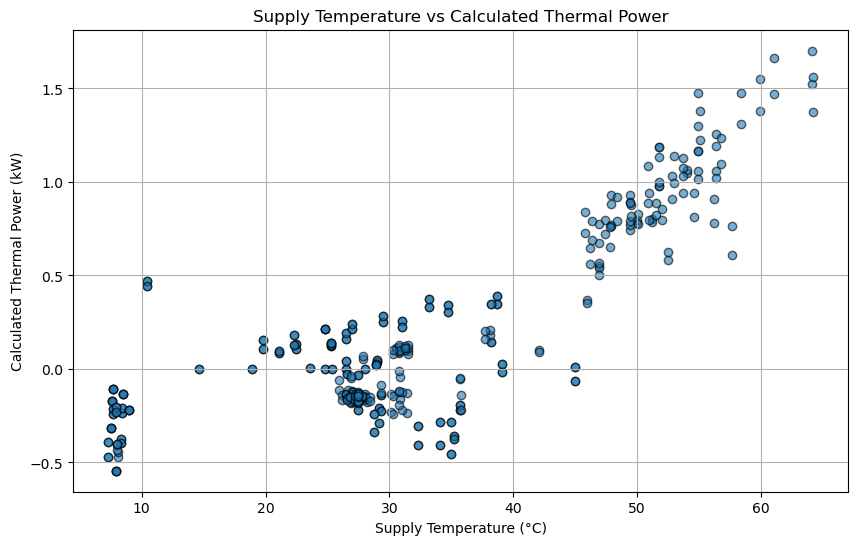

In [16]:

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_195['supply_temperature'],
    df_195['calculated_thermal_power'],
    alpha=0.6,
    edgecolor='k'
)

plt.title("Supply Temperature vs Calculated Thermal Power")
plt.xlabel("Supply Temperature (°C)")
plt.ylabel("Calculated Thermal Power (kW)")
plt.grid(True)
plt.show()

   zone_id           batch_timestamp_x            timestamp  zone_temperature  \
0      195  2018-03-23 03:27:01.575521  2018-03-23 03:27:00             20.11   
1      195  2018-03-23 03:27:01.575521  2018-03-23 03:27:00             20.11   
2      195  2018-03-23 03:27:01.575521  2018-03-23 03:27:00             20.11   
3      195  2018-03-23 03:27:01.575521  2018-03-23 03:27:00             20.11   
4      195  2018-03-24 04:27:02.301250  2018-03-24 04:27:00             19.28   
5      195  2018-03-24 04:27:02.301250  2018-03-24 04:27:00             19.28   
6      195  2018-03-24 04:27:02.301250  2018-03-24 04:27:00             19.28   
7      195  2018-03-24 04:27:02.301250  2018-03-24 04:27:00             19.28   
8      195  2018-03-26 02:27:02.241864  2018-03-26 02:27:00             19.40   
9      195  2018-03-26 02:27:02.241864  2018-03-26 02:27:00             19.40   

   zone_fan_speed  zone_valve_duty_cycle  smart_control  local_switch  \
0             0.0                  

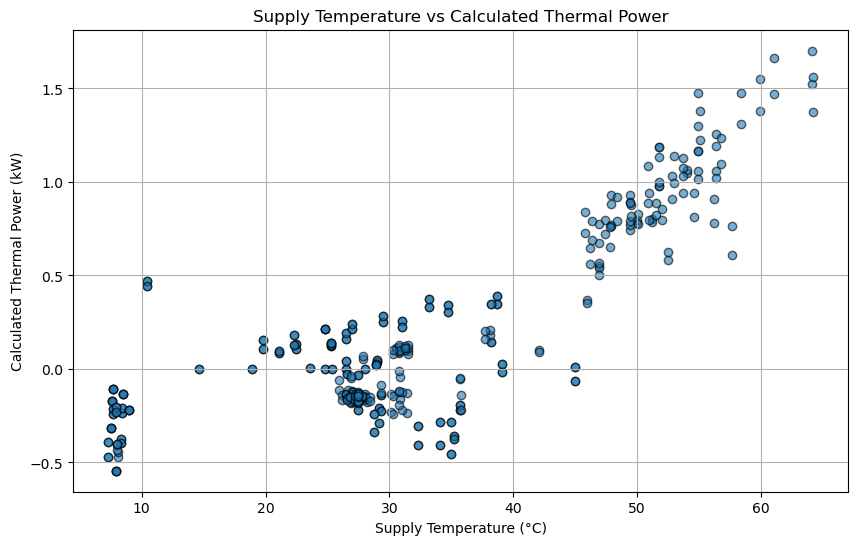

In [20]:

df_196 = df[df['zone_id'] == 196]

# (optional) reset index
df_196 = df_195.reset_index(drop=True)

print(df_196.head(10))
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_196['supply_temperature'],
    df_196['calculated_thermal_power'],
    alpha=0.6,
    edgecolor='k'
)

plt.title("Supply Temperature vs Calculated Thermal Power")
plt.xlabel("Supply Temperature (°C)")
plt.ylabel("Calculated Thermal Power (kW)")
plt.grid(True)
plt.show()


In [ ]:

df_196 = df[df['zone_id'] == 196]

# (optional) reset index
df_196 = df_195.reset_index(drop=True)

print(df_196.head(10))
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_196['supply_temperature'],
    df_196['calculated_thermal_power'],
    alpha=0.6,
    edgecolor='k'
)

plt.title("Supply Temperature vs Calculated Thermal Power")
plt.xlabel("Supply Temperature (°C)")
plt.ylabel("Calculated Thermal Power (kW)")
plt.grid(True)
plt.show()


Zone 195: kept 342 / 346 points


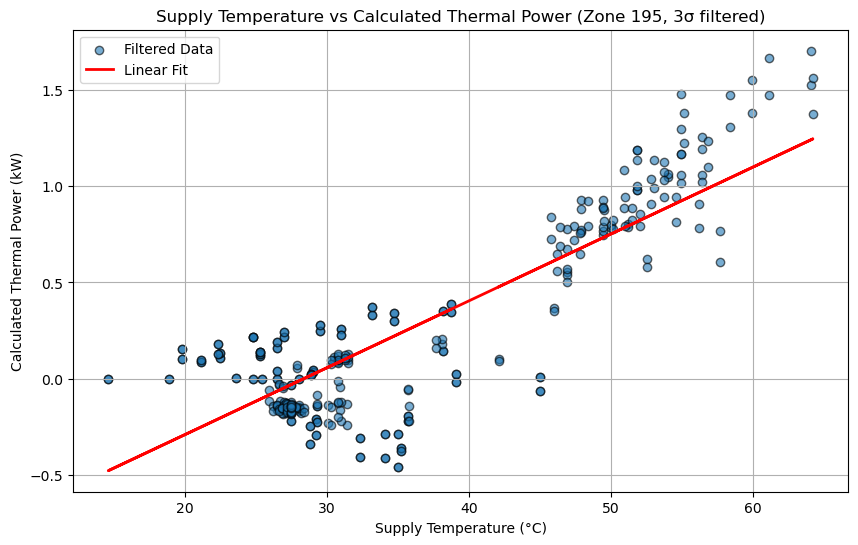

Zone 196: kept 176 / 178 points


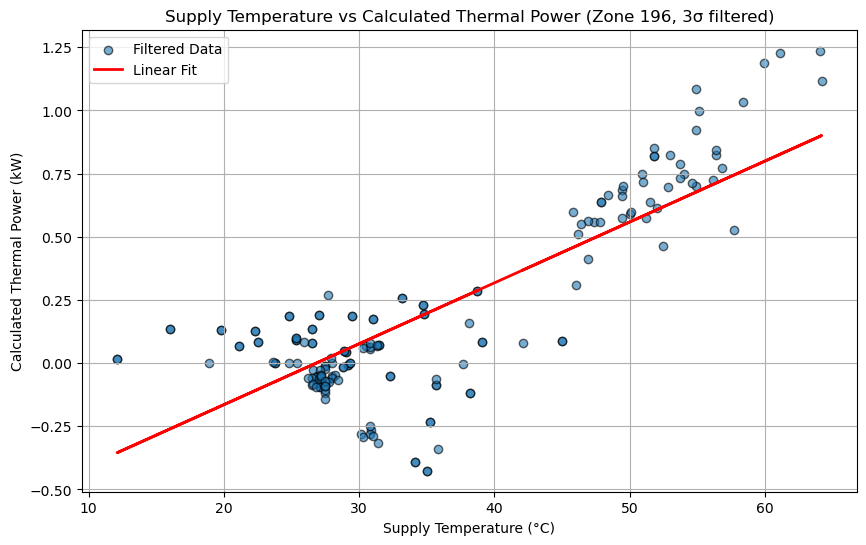

Zone 197: kept 182 / 185 points


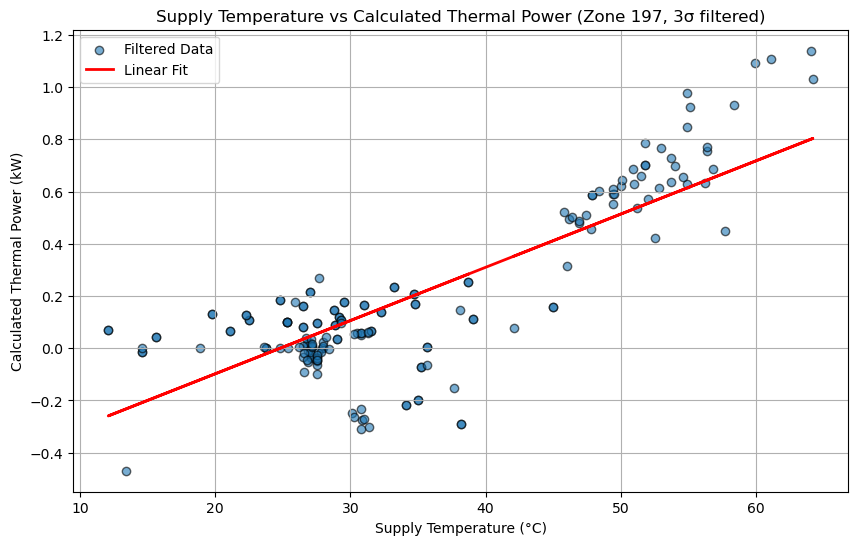

Zone 198: kept 173 / 179 points


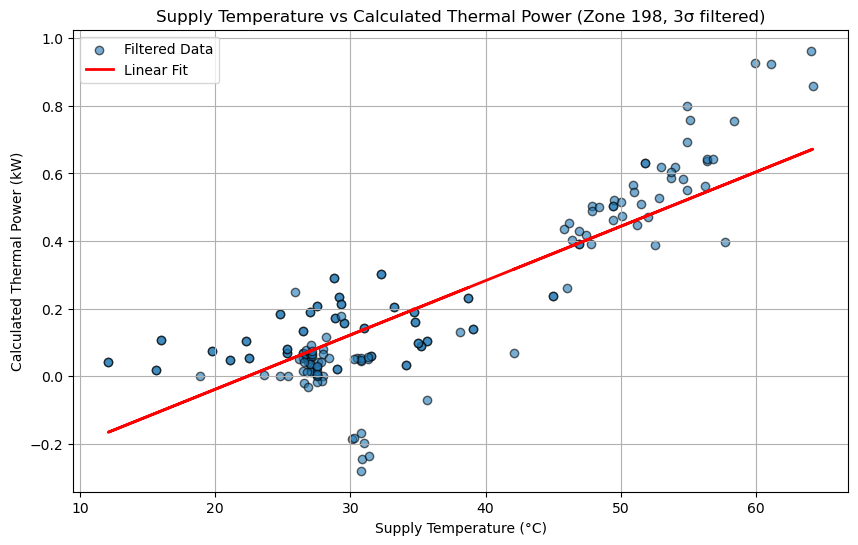

Zone 199: kept 176 / 182 points


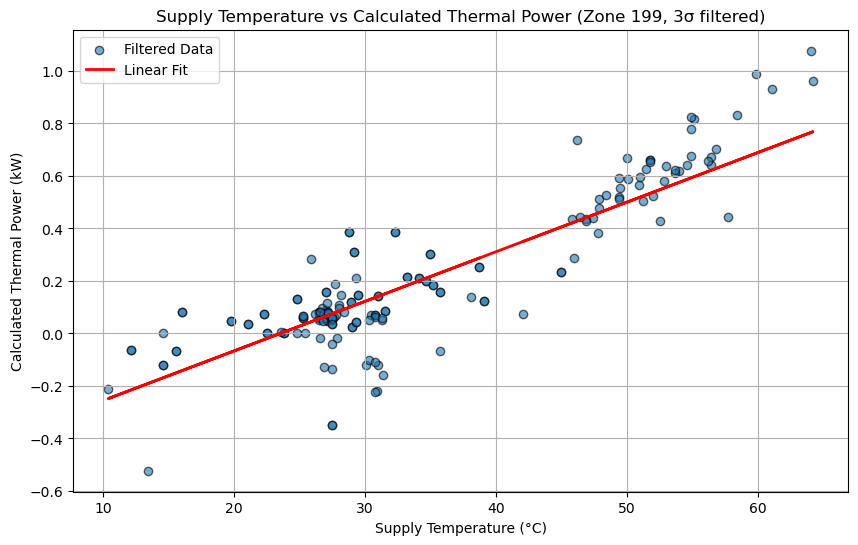

Zone 200: kept 356 / 368 points


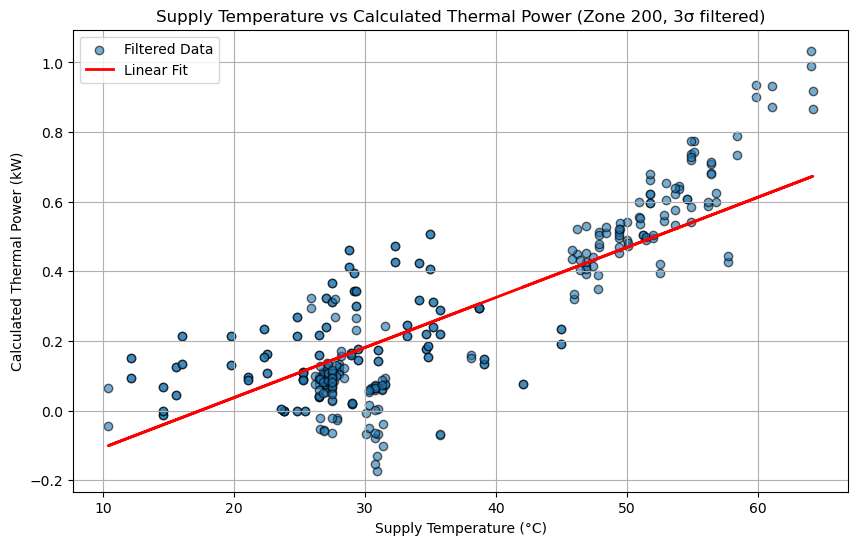

Zone 201: kept 167 / 172 points


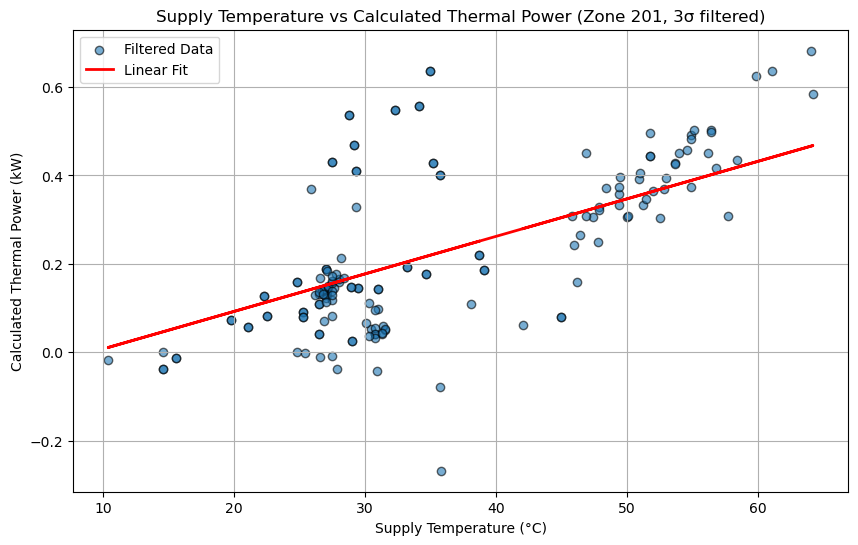

Zone 202: kept 146 / 151 points


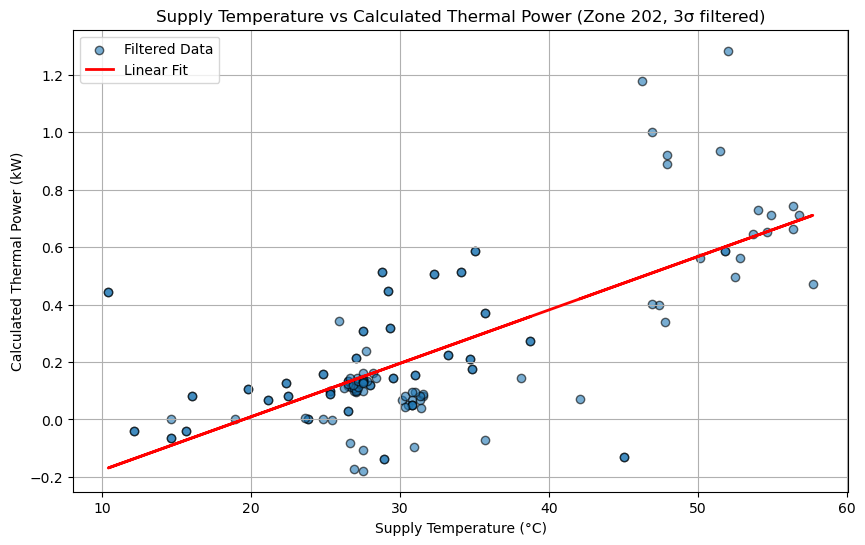

Zone 203: kept 178 / 183 points


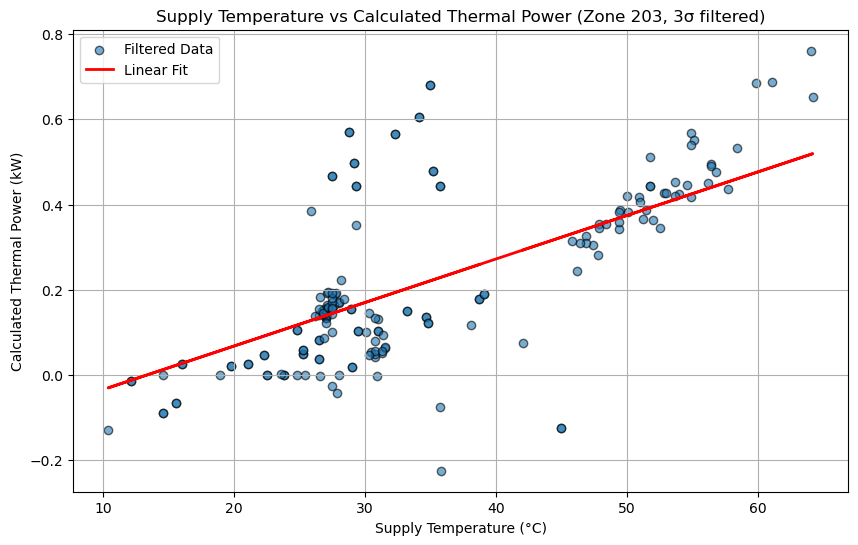

Zone 204: kept 177 / 182 points


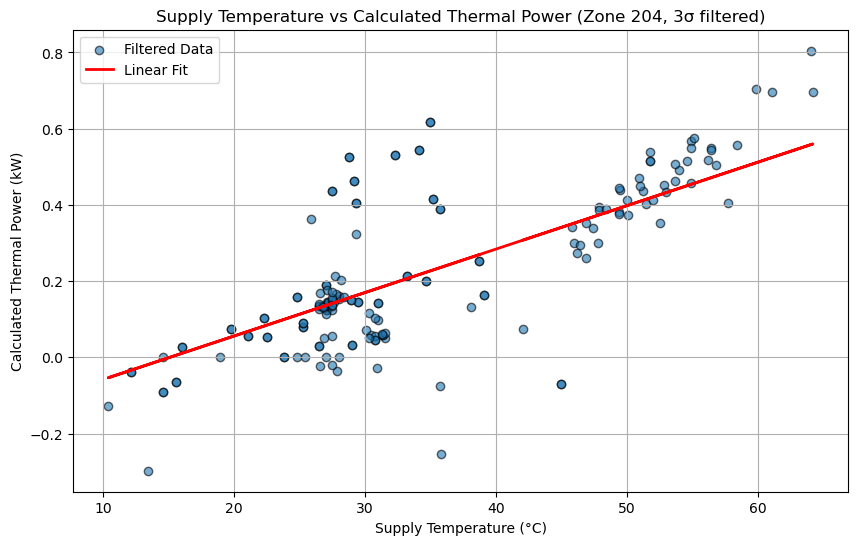

Zone 205: kept 182 / 188 points


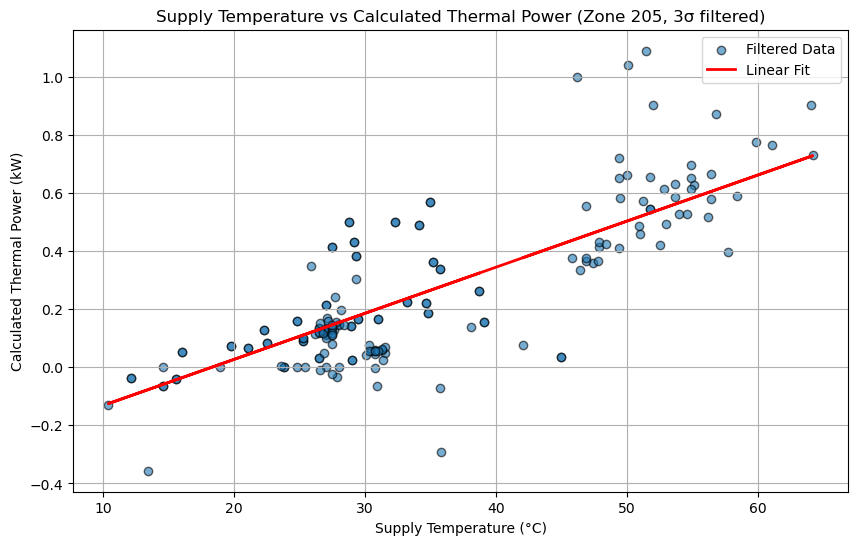

Zone 206: kept 174 / 180 points


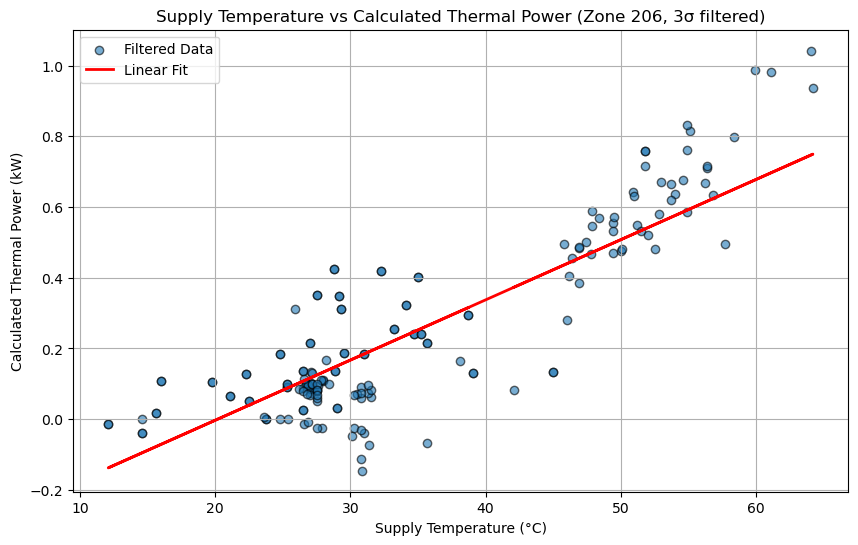

Zone 207: kept 176 / 176 points


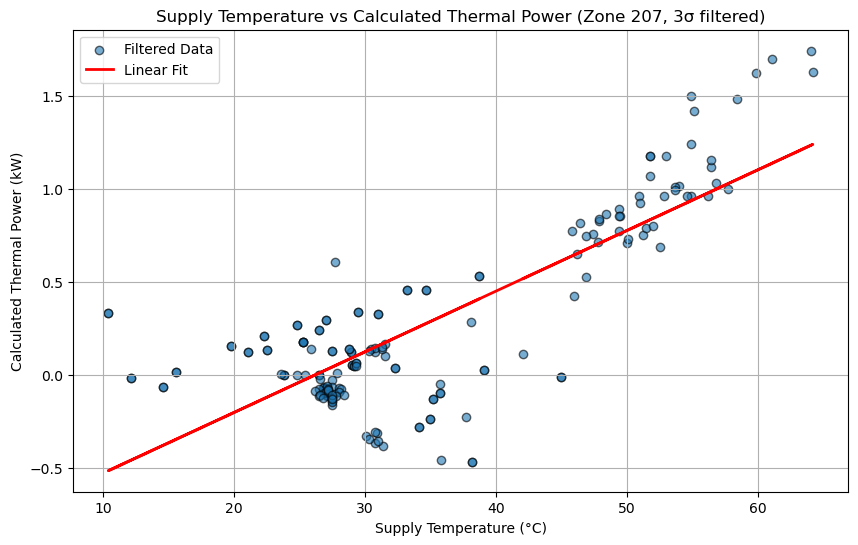

✅ Final filtered data saved to merged_filtered.csv


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

zone_ids = [195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207]

filtered_all = []  # store filtered results

for zid in zone_ids:
    df_zone = df[(df['zone_id'] == zid) & (df['supply_temperature'] >= 10)].reset_index(drop=True)

    if df_zone.empty:
        print(f"⚠️ No data for zone_id {zid}, skipping...")
        continue

    # Prepare data
    X = df_zone[['supply_temperature']].values
    y = df_zone['calculated_thermal_power'].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Residuals
    residuals = y - y_pred
    sigma = np.std(residuals)

    # 3-sigma filtering
    mask = np.abs(residuals) <= 3 * sigma
    df_filtered = df_zone[mask].copy()
    df_filtered['y_pred'] = y_pred[mask]  # optional: save regression predictions

    print(f"Zone {zid}: kept {df_filtered.shape[0]} / {df_zone.shape[0]} points")

    # Append to global list
    filtered_all.append(df_filtered)

    # Scatter plot after filtering
    plt.figure(figsize=(10, 6))
    plt.scatter(
        df_filtered['supply_temperature'],
        df_filtered['calculated_thermal_power'],
        alpha=0.6,
        edgecolor='k',
        label="Filtered Data"
    )
    plt.plot(df_filtered['supply_temperature'], df_filtered['y_pred'],
             color="red", linewidth=2, label="Linear Fit")
    plt.title(f"Supply Temperature vs Calculated Thermal Power (Zone {zid}, 3σ filtered)")
    plt.xlabel("Supply Temperature (°C)")
    plt.ylabel("Calculated Thermal Power (kW)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Merge all zones into one DataFrame
final_filtered = pd.concat(filtered_all, ignore_index=True)

# Save to CSV
final_filtered.to_csv("../../../../../results/usporedbaThermal/24/speed1/30min/merged_filtered.csv", index=False)

print("✅ Final filtered data saved to merged_filtered.csv")
